For k:  2  Distance Metric:  euclidean  with Accuracy:  0.955
For k:  2  Distance Metric:  cosine  with Accuracy:  0.955
For k:  5  Distance Metric:  euclidean  with Accuracy:  0.94
For k:  5  Distance Metric:  cosine  with Accuracy:  0.94
For k:  7  Distance Metric:  euclidean  with Accuracy:  0.93
For k:  7  Distance Metric:  cosine  with Accuracy:  0.93
For k:  11  Distance Metric:  euclidean  with Accuracy:  0.895
For k:  11  Distance Metric:  cosine  with Accuracy:  0.895
SVM Accuracy: 1.00
GaussianNB Accuracy: 0.92


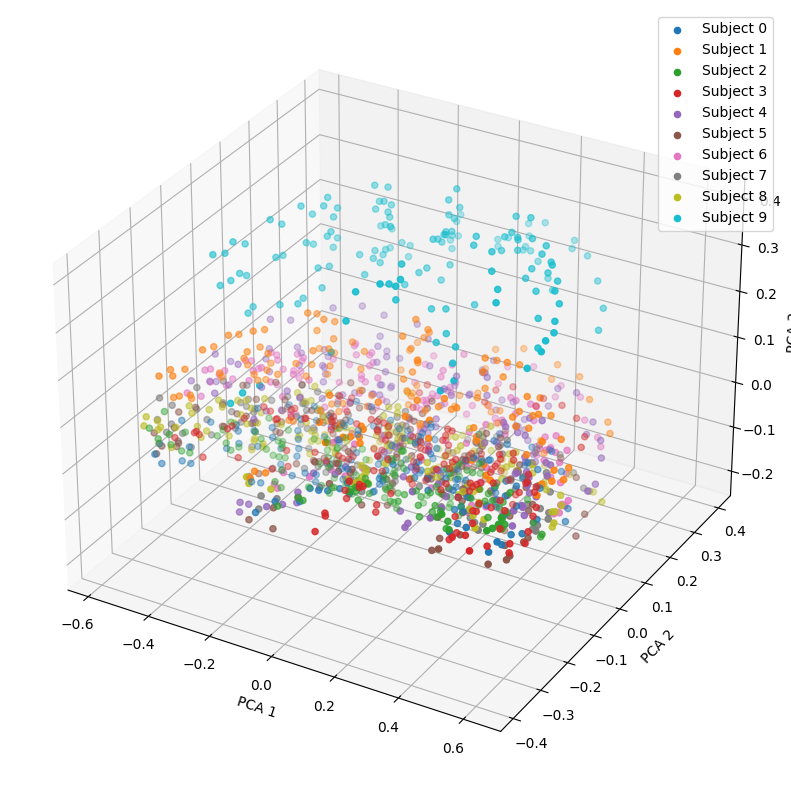

In [35]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv', header=None)

# Each row becomes Unit Length
df = df.div(np.linalg.norm(df, axis=1), axis=0)

# Test/Train Split
train_data_lst = []
train_labels_lst = []
test_data_lst = []
test_labels_lst = []

for i in range(10):
    subject_data = df[i*170:(i+1)*170].values

    train_subject_data = subject_data[:150]
    train_data_lst.extend(train_subject_data)
    train_labels_lst.extend([i] * len(train_subject_data))
    
    test_subject_data = subject_data[150:]
    test_data_lst.extend(test_subject_data)
    test_labels_lst.extend([i] * len(test_subject_data))

#KNN classifier
def knn_classifier(train_data, train_lbs, test_data, test_labels, k, distance_metric):
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
    knn.fit(train_data, train_lbs)
    accuracy = knn.score(test_data, test_labels)
    return accuracy

all_perf = {2:[],5:[],7:[],11:[]}

# Test KNN classifier with different values of k and distance metric
all_k = [2, 5, 7, 11]

dist_met = ['euclidean', 'cosine']
for distance_metric in dist_met:
    for k in all_k:
        accuracy = knn_classifier(train_data_lst, train_labels_lst, test_data_lst, test_labels_lst, k, distance_metric)
        
        try:     
            temp_lis = all_perf[k]
            temp_lis.append((distance_metric,accuracy))
            all_perf[k] = temp_lis
        except AttributeError:
            continue


# SVM
svm = SVC()
svm.fit(train_data_lst, train_labels_lst)
svm_accuracy = svm.score(test_data_lst, test_labels_lst)

# GaussianNB
gnb = GaussianNB()
gnb.fit(train_data_lst, train_labels_lst)
gnb_accuracy = gnb.score(test_data_lst, test_labels_lst)

for i in all_perf.keys():
    details = all_perf[i]
    for j in details:
        
        dist,acc = j
        print("For k: ",i," Distance Metric: ",dist," with Accuracy: ",acc)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"GaussianNB Accuracy: {gnb_accuracy:.2f}")

# 3D Visualization
pca = PCA(n_components=3)
train_pca = pca.fit_transform(train_data_lst)
test_pca = pca.transform(test_data_lst)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    ax.scatter(train_pca[i*150:(i+1)*150,0], train_pca[i*150:(i+1)*150,1], train_pca[i*150:(i+1)*150,2], label=f"Subject {i}")

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()
plt.show()